In [3]:
import pandas as pd
import numpy as np
from utils import w_data
import statsmodels.api as sm


In [4]:
df = pd.read_csv(w_data)
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-05-02,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-05-02,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-05-02,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-05-02,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-05-02,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


## OLS Model: 
Extremely simple model. 
Target variable: Weekly_Sales
Explanatory: 

In [25]:
model1_df = df.groupby("Date").agg({"Weekly_Sales":"sum", "Fuel_Price":"max"}).reset_index()
X, Y = np.log(model1_df["Fuel_Price"]),np.log(model1_df["Weekly_Sales"])
X = sm.add_constant(X)
model_simple = sm.OLS(Y, X)
results = model_simple.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.08351
Date:                Sun, 03 Sep 2023   Prob (F-statistic):              0.773
Time:                        22:24:59   Log-Likelihood:                 128.24
No. Observations:                 143   AIC:                            -252.5
Df Residuals:                     141   BIC:                            -246.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6870      0.085    209.069      0.0

### Bayesian Model

In [9]:
import pymc as pm

In [20]:
with pm.Model() as model: 
    sigma = pm.HalfCauchy("sigma", beta = 5)
    intercept = pm.Normal("intercept", 0, sigma = 20)
    slope = pm.Normal("slope", 0, sigma = 8)

    likelihood = pm.Normal("y", mu = intercept + slope * np.log(model1_df["Fuel_Price"].values), sigma = sigma, observed=np.log(model1_df["Weekly_Sales"].values))

    data = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 27 seconds.


array([[<AxesSubplot: title={'center': 'intercept'}>,
        <AxesSubplot: title={'center': 'intercept'}>],
       [<AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'slope'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

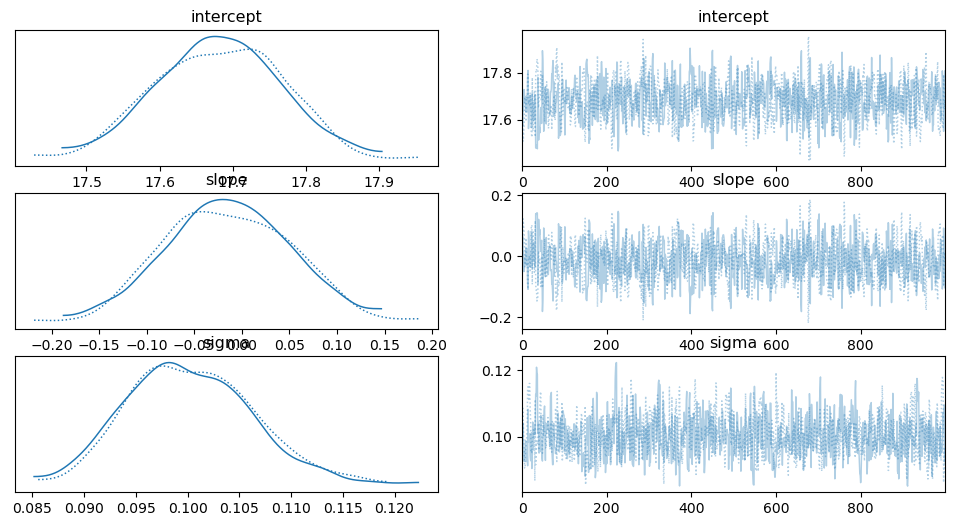

In [21]:
pm.plot_trace(data)

In [22]:
pm.summary(data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,17.681,0.085,17.524,17.835,0.003,0.002,921.0,963.0,1.0
slope,-0.014,0.065,-0.129,0.110,0.002,0.002,928.0,933.0,1.0
sigma,0.100,0.006,0.090,0.112,0.000,0.000,845.0,866.0,1.0
